#### Import libraries

In [87]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

#### Assets

In [88]:
path1 = "./assets/sample.png"
path2 = "./assets/dino.png"
path3 = "./assets/shapes.png"
path4 = "./assets/blobs.png"

#### Set RGB Channels and initialize label value

In [89]:
R_channel = 2
G_channel = 1
B_channel = 0

curr_label = 2

#### Read and display image

In [90]:
img1 = cv2.imread(path4)

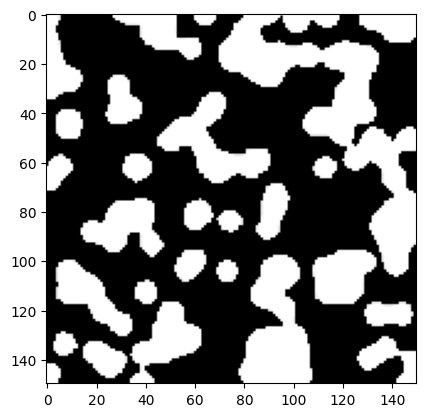

In [91]:
plt.imshow(img1)

In [92]:
img = img1.copy()

#### Create label matrix for binary representation of image

In [93]:
label = [[0 for _ in range(img.shape[1])] for _ in range(img.shape[0])]

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        try:
            if img[i][j][B_channel]:
                label[i][j] = 1
        except Exception as e:
            print(f"Exception at ({i}, {j}): {e}")



#### Component labelling the Image and mapping relations between labels

In [94]:
objs = []

for row in range(len(label)):
	for col in range(len(label[0])):
		
		if label[row][col] and row and col:
			if not label[row - 1][col] and not label[row][col - 1]:
				label[row][col] = curr_label
				curr_label += 1

			else:
				if label[row][col -1] != label[row - 1][col] and label[row][col -1] and label[row - 1][col]:
					objs.append({label[row][col-1], label[row-1][col]})

				if label[row - 1][col]:
					label[row][col] = label[row - 1][col]
				else:
					label[row][col] = label[row][col - 1]

				if label[row][col - 1] and label[row][col - 1] < label[row][col]:
					label[row][col] = label[row][col - 1]



		elif col and not row and label[row][col]:
			if label[row][col - 1]:
				label[row][col] = label[row][col - 1]
			else:
				label[row][col] = curr_label
				curr_label += 1


		elif not col and label[row][col]:
			if label[row - 1][col]:
				label[row][col] = label[row - 1][col] 
			else:
				label[row][col] = curr_label
				curr_label += 1


#### Print labelled image

In [95]:
for i in label:
    for j in i:
        print(f"{j:02}", end='')
    print()

010101010101000000000000000000000000000000000000000000020202020202020202020202020202020202020202020202020200000000000000030303030303030303000000000000000000000004040404040404040404040404040404040404040404040404040404040404040404040404040400000000000000000505050505050505050505050505050505050505050505
010101010101000000000000000000000000000000000000000000020202020202020202020202020202020202020202020202020200000000000000030303030303030303000000000000000000000004040404040404040404040404040400040404040404040404040404040404040404040404040400000000000000000505050505050505050505050505050505050505050505
010101010101000000000000000000000000000000000000000000000202020202020202020202020202020202020202020202020200000000000000030303030303030303000000000000000000000604040404040404040404040404040000040404040404040404040404040404040404040404040400000000000000000505050505050505050505050505050505050505050505
0101010101000000000000000000000000000000000000000000000000000202020202020202020202020202020202020

#### Convert set into frozen set to make it hashable

In [96]:
objs_set = list(set(frozenset(item) for item in objs))
objs_set

[frozenset({129, 133}),
 frozenset({91, 93}),
 frozenset({181, 183}),
 frozenset({30, 32}),
 frozenset({59, 62}),
 frozenset({7, 8}),
 frozenset({81, 82}),
 frozenset({88, 92}),
 frozenset({109, 111}),
 frozenset({149, 158}),
 frozenset({51, 52}),
 frozenset({41, 44}),
 frozenset({53, 56}),
 frozenset({22, 23}),
 frozenset({58, 61}),
 frozenset({125, 130}),
 frozenset({153, 155}),
 frozenset({154, 160}),
 frozenset({135, 137}),
 frozenset({164, 167}),
 frozenset({40, 43}),
 frozenset({76, 79}),
 frozenset({6, 7}),
 frozenset({32, 34}),
 frozenset({21, 22}),
 frozenset({51, 64}),
 frozenset({26, 27}),
 frozenset({51, 61}),
 frozenset({89, 109}),
 frozenset({167, 170}),
 frozenset({179, 181}),
 frozenset({70, 73}),
 frozenset({17, 19}),
 frozenset({56, 59}),
 frozenset({43, 45}),
 frozenset({77, 80}),
 frozenset({150, 151}),
 frozenset({69, 71}),
 frozenset({74, 77}),
 frozenset({177, 178}),
 frozenset({68, 70}),
 frozenset({30, 66}),
 frozenset({31, 35}),
 frozenset({63, 65}),
 frozense

#### Find minimal equivalence set from objs_set

In [97]:
final_objs = []
objs2 = [set(x) for x in objs_set]

while objs_set:
    curr_obj = objs_set.pop()
    merged = True
    while merged:
        merged = False
        rest = []
        for other in objs_set:
            if not curr_obj.isdisjoint(other):
                curr_obj |= other
                merged = True
            else:
                rest.append(other)
        objs_set = rest
    final_objs.append(frozenset(curr_obj))



In [98]:
for i in final_objs:
    print(i)

frozenset({4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 24, 25, 26, 27, 31, 35, 37, 41, 44, 47, 51, 52, 54, 55, 57, 58, 60, 61, 63, 64, 65, 67, 75, 86, 90, 94, 97, 99, 102, 104, 110})
frozenset({80, 72, 74, 77})
frozenset({66, 28, 29, 30, 32, 34, 40, 43, 45, 46, 48, 49, 50, 53, 56, 59, 62})
frozenset({168, 161, 165})
frozenset({100, 106, 107, 108, 112, 84, 87, 91, 93, 95})
frozenset({98, 101, 103, 105})
frozenset({162, 166, 169, 141, 173, 145, 147, 148, 149, 179, 181, 183, 158})
frozenset({164, 167, 170, 171, 172, 174, 180, 182, 184, 157, 159})
frozenset({42, 36, 38})
frozenset({130, 114, 116, 118, 121, 125})
frozenset({128, 113, 115, 119})
frozenset({123, 132, 127})
frozenset({129, 133, 135, 137, 140, 150, 151, 153, 155, 156, 163, 175, 177, 178, 117, 120, 124})
frozenset({69, 78, 71})
frozenset({96, 85, 88, 92})
frozenset({131, 138, 122, 126})
frozenset({144, 146, 142, 143})
frozenset({136, 139, 134})
frozenset({81, 82, 83, 89, 109, 111})
frozenset({33, 23, 21, 22, 39})


#### Color map for a maximum of 7 object

In [99]:
colors_bgr = [
    [0, 0, 255],       # Red
    [0, 255, 0],       # Green
    [255, 0, 0],       # Blue
    [0, 255, 255],     # Yellow
    [255, 0, 255],     # Purple (Magenta)
    [255, 255, 0],     # Cyan
    [203, 192, 255],   # Pink
    [128, 0, 128],     # Dark Purple
    [0, 128, 255],     # Orange
    [128, 128, 0],     # Olive
    [147, 20, 255],    # Deep Pink
    [42, 42, 165],     # Brown
    [0, 0, 128],       # Maroon
    [0, 100, 0],       # Dark Green
    [112, 128, 144],   # Slate Gray
]

colors_bgr = [np.array(np.uint8(x)) for x in colors_bgr]

#### Second Pass of component labelling

In [100]:
for row in range(len(label)):
	for col in range(len(label[0])):
		
		if label[row][col]:

			for obj in final_objs:
		
				if label[row][col] in obj:
					label[row][col] = min(obj)

#### Print the labelled image after applying minimal equivalence set 

In [101]:
for i in label:
    for j in i:
        print(f"{j:02}", end='')
    print()

010101010101000000000000000000000000000000000000000000020202020202020202020202020202020202020202020202020200000000000000030303030303030303000000000000000000000004040404040404040404040404040404040404040404040404040404040404040404040404040400000000000000000505050505050505050505050505050505050505050505
010101010101000000000000000000000000000000000000000000020202020202020202020202020202020202020202020202020200000000000000030303030303030303000000000000000000000004040404040404040404040404040400040404040404040404040404040404040404040404040400000000000000000505050505050505050505050505050505050505050505
010101010101000000000000000000000000000000000000000000000202020202020202020202020202020202020202020202020200000000000000030303030303030303000000000000000000000404040404040404040404040404040000040404040404040404040404040404040404040404040400000000000000000505050505050505050505050505050505050505050505
0101010101000000000000000000000000000000000000000000000000000202020202020202020202020202020202020

#### Color the objects based on their label value

In [102]:
def get_color(label):
	for objidx in range(len(final_objs)):
		if label in final_objs[objidx]:
			return colors_bgr[(objidx) % len(colors_bgr)]

	
	return [0, 0, 0]

In [103]:
for row in range(len(label)):
	for col in range(len(label[0])):
		if label[row][col] != 0:
			img[row][col] = get_color(label[row][col])

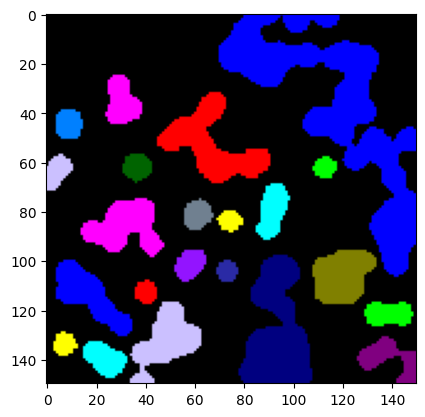

In [104]:
plt.imshow(img)

#### Saving output

In [105]:
plt.imsave(f'./outputs/{input("Image name? ")}.png', img)